In [1]:
import pandas as pd
import re
import os
import importlib
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.simplefilter('always')
import numpy as np
import importlib

from scripts.a_data_loading_cleaning import run_load_clean_diagnose_data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Loading & Cleaning

In [2]:
csv_path = f"results/controlled_results.csv"
df = run_load_clean_diagnose_data(csv_path)

✅ Total generated tokens value is constant: 16384
Original distribution:
total_generated_tokens
16384    2682
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Round 1: Verfifying FLOPs on raw df
NB: FLOPs values are NOT constant: [1.69499710e+13 2.02486233e+13 0.00000000e+00 5.26385823e+13]
Original distribution:
flops
0.000000e+00       5
1.694997e+13      22
2.024862e+13    2265
5.263858e+13     390
Name: count, dtype: int64

Dominant FLOPs value: 20248623316992.0
- Affected rows count: 417
- Affected row indices: [0, 36, 155, 234, 283, 426, 548, 617, 630, 683, 719, 761, 904, 1000, 1051, 1246, 1294, 1392, 1485, 1531, 1631, 1779, 1815, 2038, 2071, 2214, 2239, 2292, 2293, 2294, 2295, 2296, 2297, 2298, 2299, 2300, 2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310, 2311, 2312, 2313, 2314, 2315, 2316, 2317, 2318, 2319, 2320, 2321, 2322, 2323, 2324, 2325, 2326, 2327, 2328, 2329, 2330, 2331, 2332, 2333, 2

/Users/henrybaker/repositories/thesis_analysis/scripts/a_data_loading_cleaning.py:611: UserWarning: NB: FLOPs values are NOT constant: [1.69499710e+13 2.02486233e+13 0.00000000e+00 5.26385823e+13]
  if not verify_flops(df):
/Users/henrybaker/repositories/thesis_analysis/scripts/a_data_loading_cleaning.py:621: UserWarning: NB: FLOPs values are NOT constant: [1.69499710e+13 5.26385823e+13]
  verify_flops(df)


# Exploratory Data Analysis (EDA)

In [3]:
import scripts.b_exploratory_data_analysis as eda
importlib.reload(eda)

from scripts.b_exploratory_data_analysis import (
    plot_energy_histograms,
    plot_energy_boxplots,
    plot_throughput_vs_energy,
    plot_scatter_by_model,
    plot_divergence_by_model,
    plot_all_diagnostics
)

plot_all_diagnostics(df)

ImportError: cannot import name 'plot_energy_histograms' from 'scripts.b_exploratory_data_analysis' (/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py)

TO DO:
- [ ] do a proper grid search on both models-> be able to properly compare e.g. num processes against everything  at all levels!
- [ ] throughput is clearly important! plot it in each of the controlled plots !!!
- [ ] also print average_latency_ms_per_batch

outcome vars to plot across controlled vars
- [ ] energy_per_token_kwh_mean
- [ ] average_latency_ms_per_batch
- [ ] throughput_tokens_per_sec_mean

Then do as a full grid search -> don't filter the db, but print at all levels

# Controlled Experiment Visualisation

- [x] FLOPs to be visually diff
- [x] decoder temp yaxis not normalising
- [ ] Normalise axes as z-scores
- [ ] if decoder temp remains a mess, print stratified by cycle
- [ ] on latency axis, print out the interval range!
- [ ] remove the FLOPs line from the Deocder & Latency plots
- [ ] change normalised axes to say 'normalised to baseline'
- [ ] top p and k value normalised plots: the y axis does not have 'normalised'
- [ ] add the baseline annotation BELOW the red dotted line
- [ ] do as full grid search

In [4]:
configs = ['num_processes', 'batching','precis', 'decoding', 'latency']
dfs = {config: df[df['config_name'].str.startswith(config)] for config in configs}

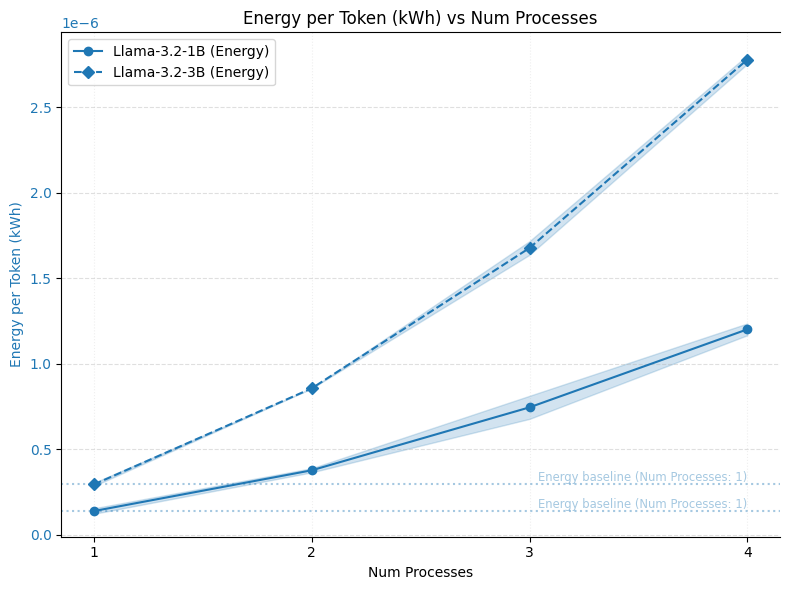

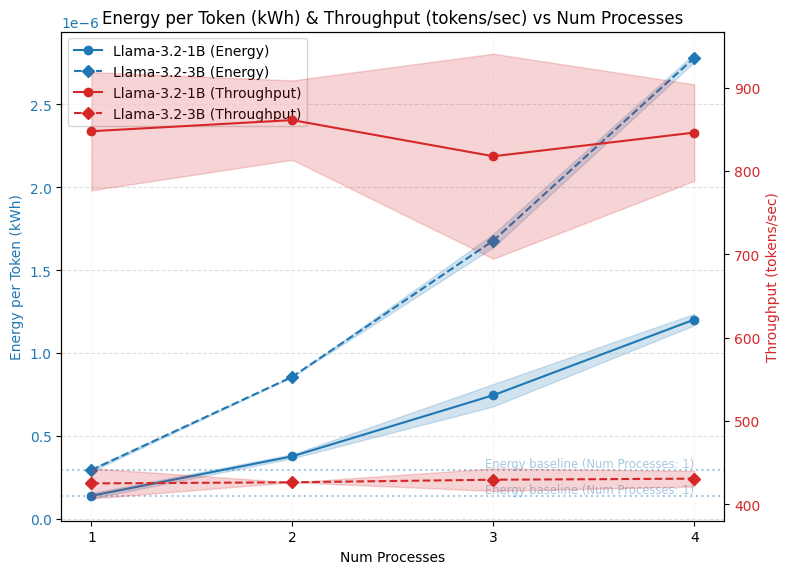

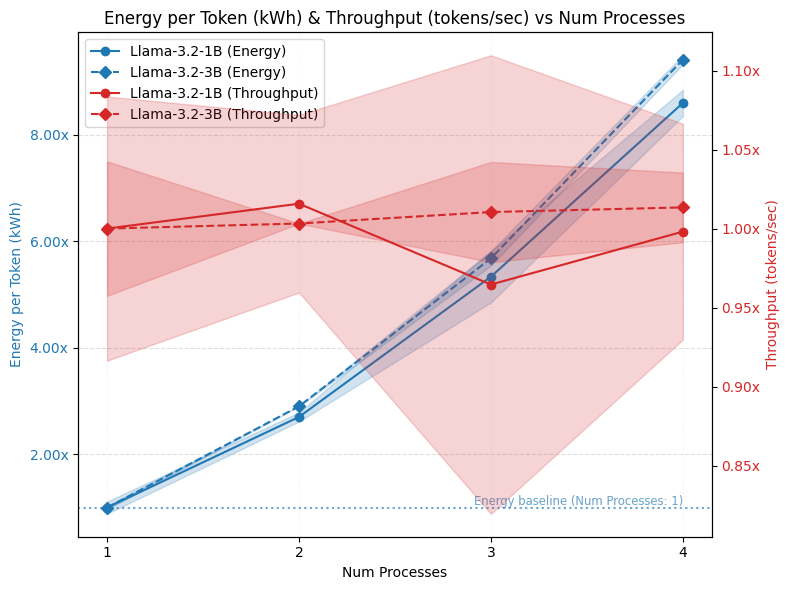

In [11]:
import scripts.c_controlled_exp_viz_energy_throughput as viz
importlib.reload(viz)

from scripts.c_controlled_exp_viz_energy_throughput import (
    plot_num_processes,
    plot_batching,
    plot_precision,
    #plot_decoder_temperature,
    #plot_decoder_topk,
    #plot_decoder_topp,
    #plot_latency_by_burst_size,
    #plot_latency_by_burst_interval,
)

# 1) Number of processes

plot_num_processes(
    dfs,
    ax1='energy_per_token',
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)

plot_num_processes(
    dfs,
    ax1='energy_per_token',
    ax2='throughput_tokens_per_sec',
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)

plot_num_processes(
    dfs,
    ax1='energy_per_token',
    ax2='throughput_tokens_per_sec',
    normalise_axes=['ax1', 'ax2'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)



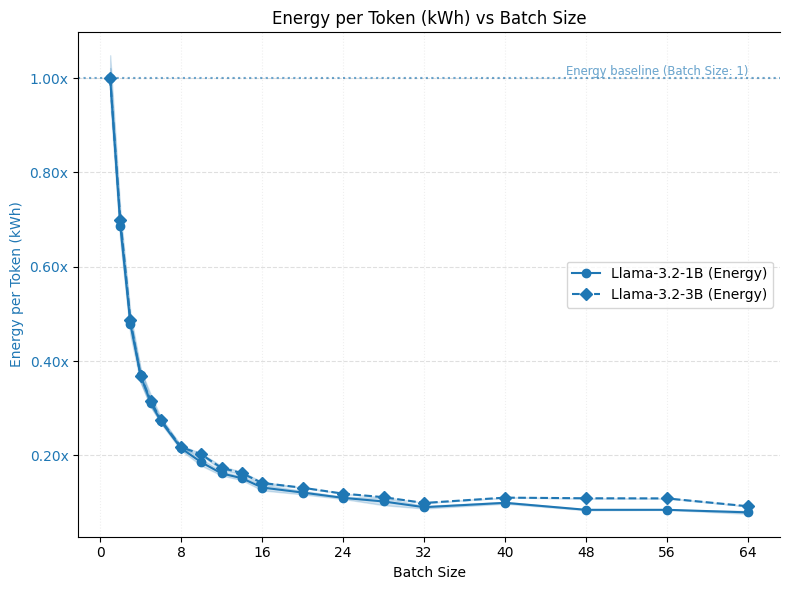

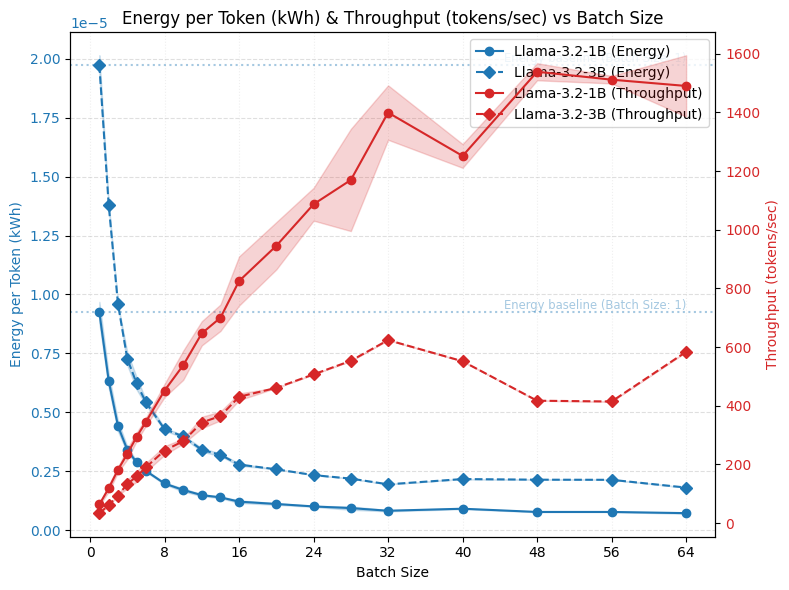

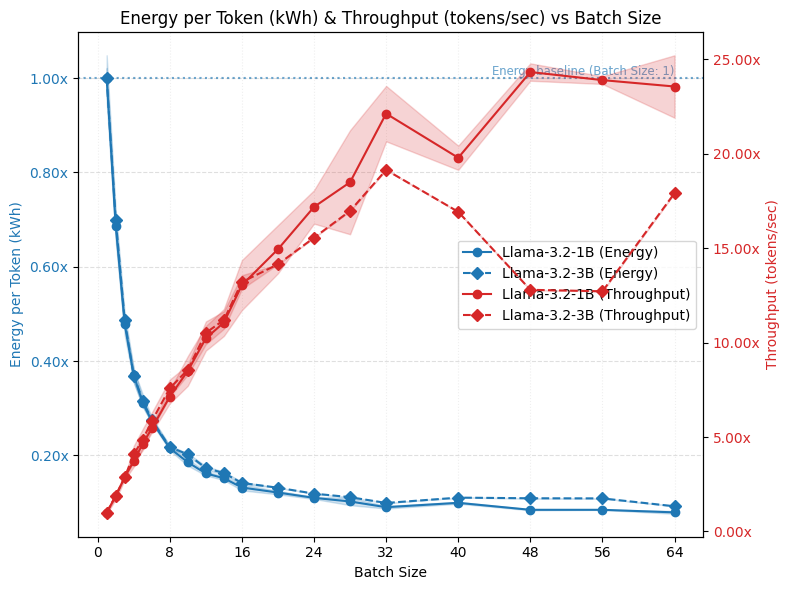

In [13]:
# 2) Batch size
plot_batching(
    dfs,
    ax1='energy_per_token',
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
    )

plot_batching(
    dfs,
    ax1='energy_per_token',
    ax2='throughput_tokens_per_sec',
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)

plot_batching(
    dfs,
    ax1='energy_per_token',
    ax2='throughput_tokens_per_sec',
    normalise_axes=['ax1', 'ax2'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)



/Users/henrybaker/repositories/thesis_analysis/scripts/c_controlled_exp_viz_energy_throughput.py:115: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  
/Users/henrybaker/repositories/thesis_analysis/scripts/c_controlled_exp_viz_energy_throughput.py:115: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  


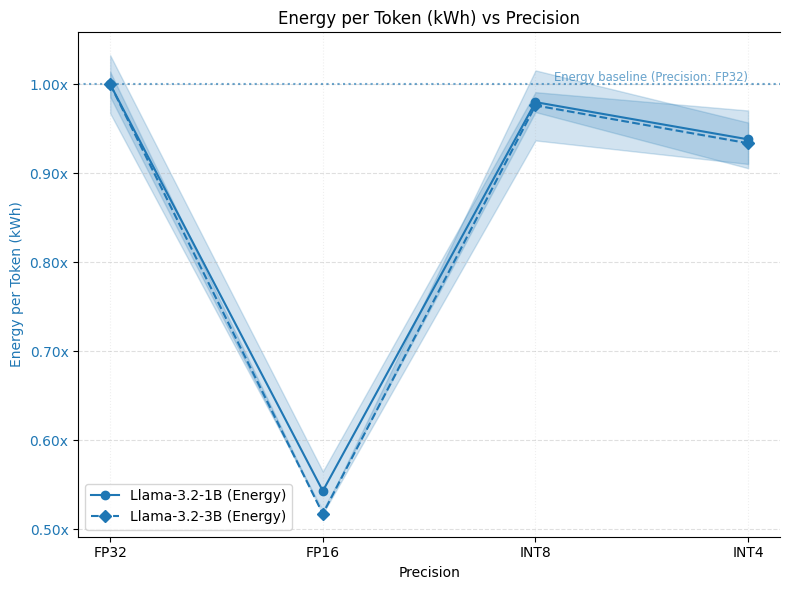

/Users/henrybaker/repositories/thesis_analysis/scripts/c_controlled_exp_viz_energy_throughput.py:115: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  
/Users/henrybaker/repositories/thesis_analysis/scripts/c_controlled_exp_viz_energy_throughput.py:128: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std1  /= base1
/Users/henrybaker/repositories/thesis_analysis/scripts/c_controlled_exp_viz_energy_throughput.py:115: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future 

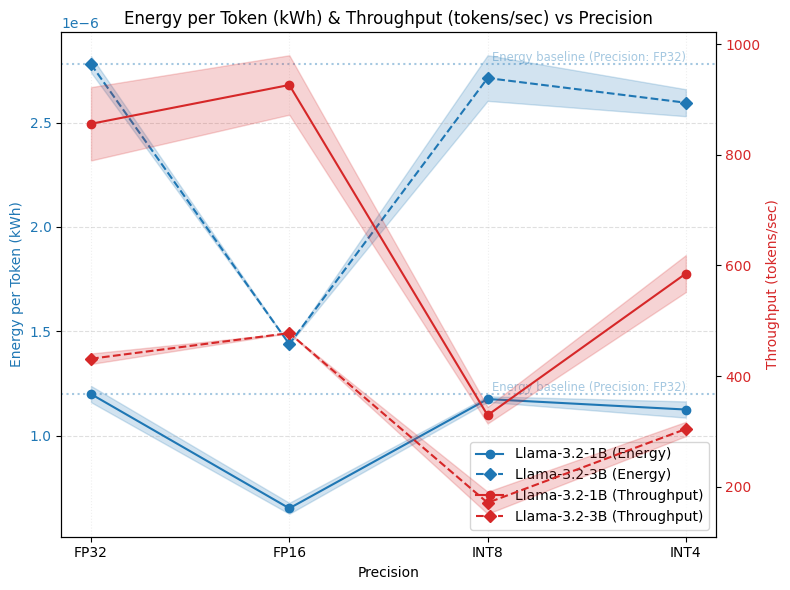

/Users/henrybaker/repositories/thesis_analysis/scripts/c_controlled_exp_viz_energy_throughput.py:115: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  
/Users/henrybaker/repositories/thesis_analysis/scripts/c_controlled_exp_viz_energy_throughput.py:128: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std1  /= base1
/Users/henrybaker/repositories/thesis_analysis/scripts/c_controlled_exp_viz_energy_throughput.py:115: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future 

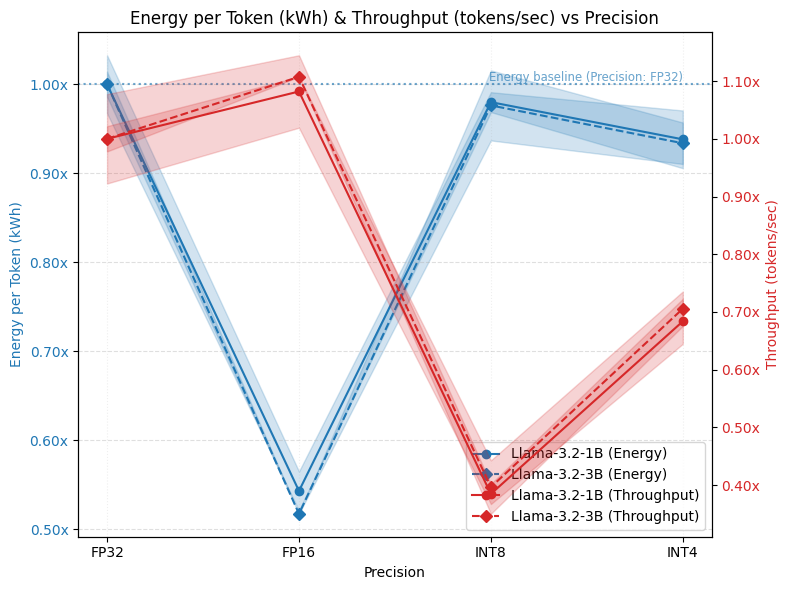

In [ ]:
# 3) Precision modes (FP32/FP16/INT8/INT4)
plot_precision(
    dfs,
    ax1='energy_per_token',
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)

plot_precision(
    dfs,
    ax1='energy_per_token',
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)

plot_precision(
    dfs,
    ax1='energy_per_token',
    ax2='throughput_tokens_per_sec',
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)

plot_precision(
    dfs,
    ax1='energy_per_token',
    ax2='throughput_tokens_per_sec',
    normalise_axes=['ax1', 'ax2'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)

# Modeling

TO DO: WORK OUT % OF TOTAL ENERGY CONSUMPTION / VARIANCE THAT CAN BE EXPLAINED BY TOTAL CONFIGS CHANGES VS BASELINE THAT IS MODEL DETERMINED


📊 Running OLS regression for energy_per_token_kwh...

                             OLS Regression Results                             
Dep. Variable:     energy_per_token_kwh   R-squared:                       0.257
Model:                              OLS   Adj. R-squared:                  0.226
Method:                   Least Squares   F-statistic:                     8.293
Date:                  Sat, 26 Apr 2025   Prob (F-statistic):           0.000806
Time:                          19:28:50   Log-Likelihood:                 667.97
No. Observations:                    51   AIC:                            -1330.
Df Residuals:                        48   BIC:                            -1324.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

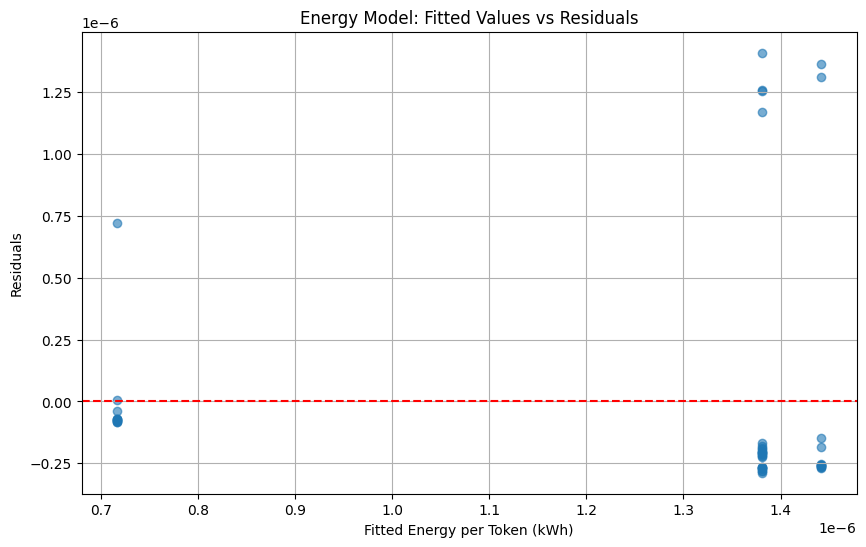


📊 Running OLS regression for energy_per_token_kwh...

                             OLS Regression Results                             
Dep. Variable:     energy_per_token_kwh   R-squared:                       0.257
Model:                              OLS   Adj. R-squared:                  0.226
Method:                   Least Squares   F-statistic:                     8.293
Date:                  Sat, 26 Apr 2025   Prob (F-statistic):           0.000806
Time:                          19:28:50   Log-Likelihood:                 667.97
No. Observations:                    51   AIC:                            -1330.
Df Residuals:                        48   BIC:                            -1324.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

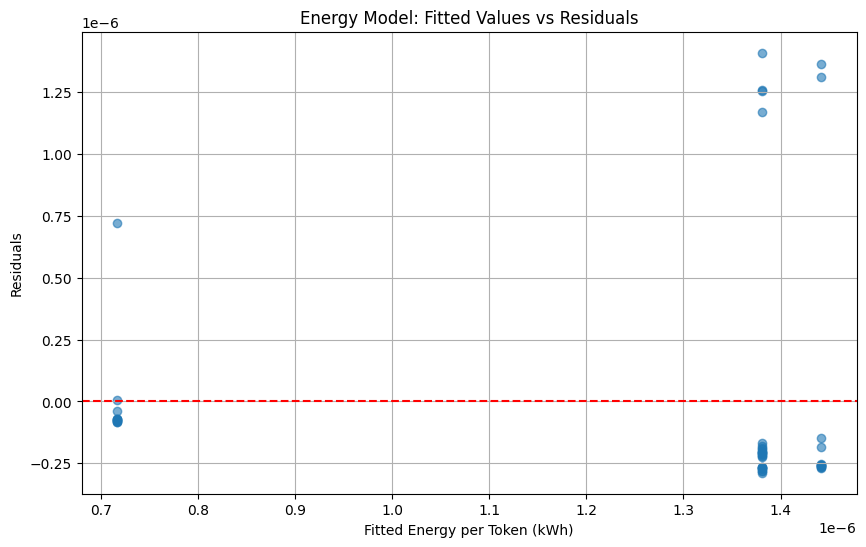

In [8]:
from scripts.d_base_regression import run_full_regression_analysis, preprocess_data

df = preprocess_data(df)

# With default predictors
run_full_regression_analysis(df)

# With custom predictors
custom_predictors = ["batch_size_numeric", "C(fp_precision)", "C(quantization)"]
run_full_regression_analysis(df, predictors=custom_predictors)


In [9]:
%run scripts/d_mixed_effects_model.py

/Users/henrybaker/miniconda3/envs/thesis/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
/Users/henrybaker/miniconda3/envs/thesis/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
/Users/henrybaker/miniconda3/envs/thesis/lib/python3.12/ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
/Users/henrybaker/miniconda3/envs/thesis/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
/Users/henrybaker/miniconda3/envs/thesis/lib/python3.12/ast.py:587: DeprecationWarning: Attribute s is depr

Exception: File `'scripts/d_mixed_effects_model.py'` not found.

In [ ]:
df['energy_per_token_kwh'].max() -  df['energy_per_token_kwh'].min() 

Modelling to do
- [ ] set up hoerarchical model -> identify groupings:
   - [ ] use model (even though currently only one model)
   - [ ] use config_name and date_time
   - [ ] use decoder configs
   - [ ] latency configs 